In [3]:
import processing
import ml
import ds

In [4]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [5]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)

In [6]:
data_km=ml.kalman_ma(data)

In [7]:
data_km.head(5)

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,Volume,vwap,Change,Flow,km
2017-12-29 21:14:58.135570,267.820007,54.0,267.809998,14.0,267.815002,267.815002,267.820007,267.799988,68.0,267.817963,0.0,-40.0,256.904999
2017-12-29 21:14:58.820995,267.820007,54.0,267.809998,19.0,267.815002,267.815002,267.820007,267.799988,73.0,267.817383,0.0,-35.0,260.588144
2017-12-29 21:15:00.302764,267.820007,54.0,267.809998,23.0,267.815002,267.815002,267.820007,267.799988,77.0,267.817017,0.0,-31.0,262.451539
2017-12-29 21:15:00.310661,267.820007,49.0,267.809998,23.0,267.815002,267.815002,267.820007,267.799988,72.0,267.816803,0.0,-26.0,263.584156
2017-12-29 21:15:00.323921,267.820007,49.0,267.809998,28.0,267.815002,267.815002,267.820007,267.799988,77.0,267.816345,0.0,-21.0,264.350079


### Momentum
https://www.quantopian.com/research/notebooks/Cloned%20from%20%22Quantopian%20Lecture%20Series%3A%20Measuring%20Momentum%22.ipynb

    Hurst exponent helps test whether the time series is:
    (1) A Random Walk (H ~ 0.5)
    (2) Trending (H > 0.5)
    (3) Mean reverting (H < 0.5)
    
    https://www.quantopian.com/posts/hurst-exponent
    https://www.quantopian.com/posts/neural-network-that-tests-for-mean-reversion-or-momentum-trending    

In [10]:
H=ml.hurst(data_km.Open.tail(100))

In [11]:
H

0.6543392022599912

In [12]:
from statsmodels import regression
import statsmodels.api as sm
import scipy.stats as stats
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  from ipykernel import kernelapp as app


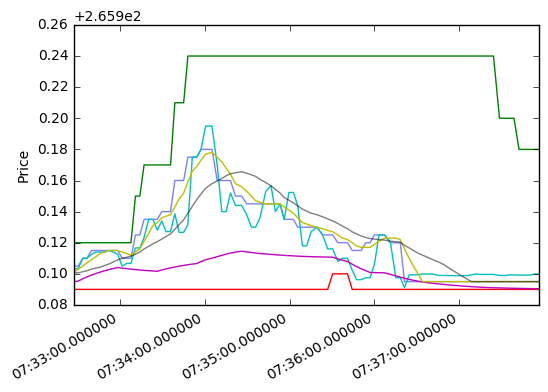

In [13]:
short_mavg = pd.rolling_mean(data_km.Open,5)
long_mavg = pd.rolling_mean(data_km.Open,15)

data_km.Open.tail(100).plot(alpha = 0.5)
data_km.High.tail(100).plot()
data_km.Low.tail(100).plot()
data_km.vwap.tail(100).plot()
data_km.km.tail(100).plot()
short_mavg.tail(100).plot()
long_mavg.tail(100).plot(alpha = 0.5)

plt.ylabel('Price')
plt.show()

### Moving Average Crossover Ribbons

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
/hom

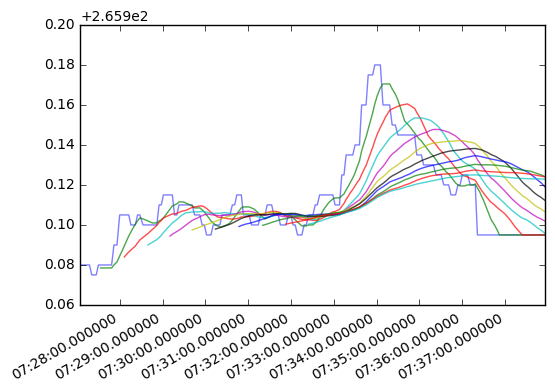

In [14]:
asset=data_km.Open.tail(200)
asset.plot(alpha = 0.5)

rolling_means = {}

for i in np.linspace(10, 100, 10):
    X = pd.rolling_mean(asset,int(i))
    rolling_means[i] = X
    X.plot(alpha = 0.7)
    
rolling_means = pd.DataFrame(rolling_means).dropna()
plt.show()

### Information from the above Ribbon
##### Distance Metric

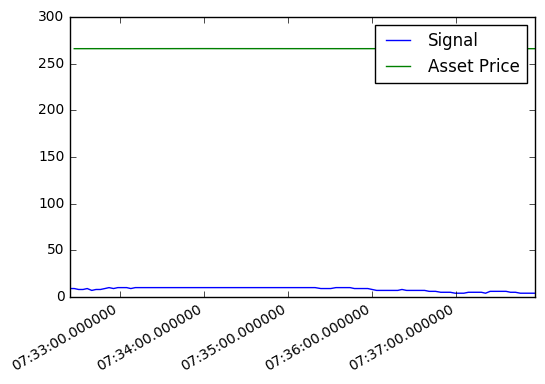

In [18]:
asset=data_km.Open.tail(100)
scores = pd.Series(index=asset.index)
for date in rolling_means.index:
    mavg_values = rolling_means.loc[date]
    ranking = stats.rankdata(mavg_values.values)
    d = distance.hamming(ranking, range(1, 11))
    scores[date] = d
    
# Normalize the  score
(10 * scores).plot();
asset.plot()
plt.legend(['Signal', 'Asset Price']);
plt.show()

#### correlation metric.

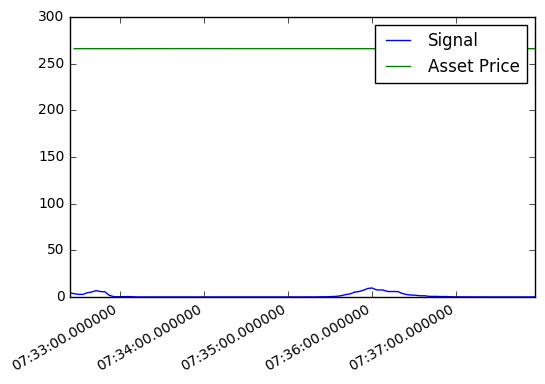

In [20]:
asset=data_km.Open.tail(100)
scores = pd.Series(index=asset.index)
for date in rolling_means.index:
    mavg_values = rolling_means.loc[date]
    ranking = stats.rankdata(mavg_values.values)
    _, d = stats.spearmanr(ranking, range(1, 11))
    scores[date] = d

# Normalize the  score
(10 * scores).plot();
asset.plot()
plt.legend(['Signal', 'Asset Price']);
plt.show()

#### Measuring Thickness

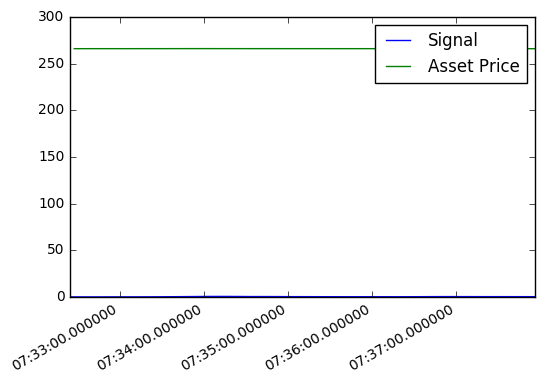

In [22]:
asset=data_km.Open.tail(100)
scores = pd.Series(index=asset.index)
for date in rolling_means.index:
    mavg_values = rolling_means.loc[date]
    d = np.max(mavg_values) - np.min(mavg_values)
    scores[date] = d
    
# Normalize the  score
(10 * scores).plot();
asset.plot()
plt.legend(['Signal', 'Asset Price']);
plt.show()

#### Momentum From Physics

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).sum()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).sum()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).sum()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/home/oct

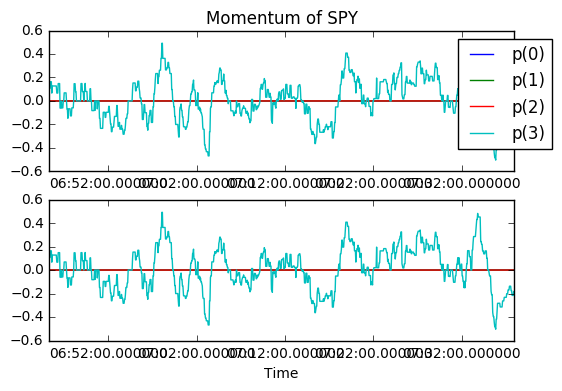

In [25]:
k = 30
pricing=data_km.Open.tail(1000)
x = np.log(pricing)
v = x.diff()
m = (0.5*(data_km.askSize.tail(1000)+data_km.bidSize.tail(1000)))/((max(data_km.askSize)+max(data_km.bidSize))*0.5)

p0 = pd.rolling_sum(v, k)
p1 = pd.rolling_sum(m*v, k)
p2 = p1/pd.rolling_sum(m, k)
p3 = pd.rolling_mean(v, k)/pd.rolling_std(v, k)

f, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(p0)
ax1.plot(p1)
ax1.plot(p2)
ax1.plot(p3)
ax1.set_title('Momentum of SPY')
ax1.legend(['p(0)', 'p(1)', 'p(2)', 'p(3)'], bbox_to_anchor=(1.1, 1))


ax2.plot(p0)
ax2.plot(p1)
ax2.plot(p2)
ax2.plot(p3)
#ax2.axis([0, 300, -0.005, 0.005])
ax2.set_xlabel('Time');
plt.show()

#### REF:
    https://www.quantopian.com/posts/some-code-from-ernie-chans-new-book-implemented-in-python

In [29]:
k = 30
d=3
prices=data_km.Open.tail(1000)
x = np.log(pricing)
v = x.diff()
m = (0.5*(data_km.askSize.tail(1000)+data_km.bidSize.tail(1000)))/((max(data_km.askSize)+max(data_km.bidSize))*0.5)

p0 = pd.rolling_sum(v, k)
p1 = pd.rolling_sum(m*v, k)
p2 = p1/pd.rolling_sum(m, k)
p3 = pd.rolling_mean(v, k)/pd.rolling_std(v, k)

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).sum()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).sum()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).sum()
/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/home/oc

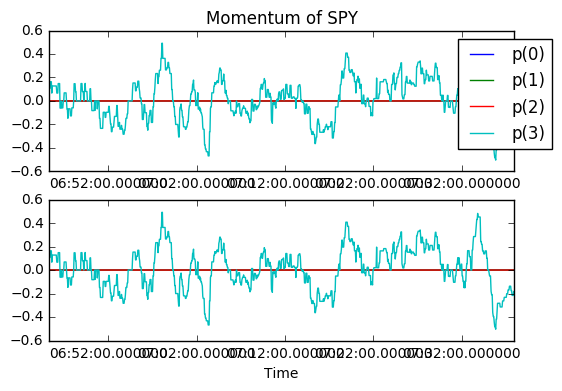

In [30]:
f, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(p0)
ax1.plot(p1)
ax1.plot(p2)
ax1.plot(p3)
ax1.set_title('Momentum of SPY')
ax1.legend(['p(0)', 'p(1)', 'p(2)', 'p(3)'], bbox_to_anchor=(1.1, 1))


ax2.plot(p0)
ax2.plot(p1)
ax2.plot(p2)
ax2.plot(p3)
#ax2.axis([0, 300, -0.005, 0.005])
ax2.set_xlabel('Time');
plt.show()

In [31]:
import talib

In [ ]:
output = talib.MOM(np.ndarray(data.Close), timeperiod=5)

In [ ]:
from talib.abstract import *

# uses close prices (default)
output = SMA(data.Close, timeperiod=25)

In [ ]:
adx = talib.ADX(np.data.high,data.low,data.Close,timeperiod=14)

In [ ]:
import talib
import numpy as np
h = np.array(data.high)
l = np.array(data.low)
c = np.array(data.close.asfloat)
output_atr = np.array(talib.ATR(h,l,c,14))

In [ ]:
import pandas as pd
pd.set_option("max_rows", 10)
import talib
h = np.array(data.high)
l = np.array(data.low)
c = np.array(data.close)
data.columns = data.columns.str.lower()
talib.abstract.EMA(data, timeperiod=32, price='close')

In [ ]:
import os
import pandas as pd
import talib
from talib import SMA

#### http://nsetools.readthedocs.io/en/latest/usage.html
#### https://github.com/vsjha18/nsetools

In [ ]:
from nsetools import Nse
nse = Nse()
print(nse)

In [ ]:
q = nse.get_quote('infy') # it's ok to use both upper or lower case for codes.
from pprint import pprint # just for neatness of display
pprint(q)

In [ ]:
adv_dec = nse.get_advances_declines()
pprint(adv_dec)

#### http://nsepy.readthedocs.io/en/latest/
#### https://github.com/swapniljariwala/nsepy

In [ ]:
# !pip install nsepy

In [ ]:
from nsepy import get_history
from datetime import date
data = get_history(symbol="SBIN", start=date(2015,1,1), end=date(2016,1,31))
data[['Close']].plot()

In [ ]:
data.tail()

In [ ]:
from googlefinance import getQuotes
import time
import json
import os
import sys

def fetchstockquotes(symbol):
    while True:
        os.system('cls' if os.name=='nt' else 'clear')
        print(json.dumps(getQuotes(symbol), indent=2))
        time.sleep(5)

symbol=sys.argv[1]
fetchstockquotes(symbol)

In [ ]:
import urllib
import re
import time
import sys

def fetchstockquotes(symbol):
    base_url = 'http://finance.google.com/finance?q='
    content = urllib.urlopen(base_url + symbol).read()
    m = re.search('id="ref_(.*?)">(.*?)<', content)
    if m:
        quote = m.group(2)
    else:
        quote = 'no quote available for: ' + symbol
    return quote

symbol=sys.argv[1]
while True:
    print
    print(str(time.ctime())+ " - " + symbol+ " - " + fetchstockquotes(symbol))
    time.sleep(5)